In [1]:
import qiskit
from qiskit.backends import BaseBackend
from qiskit.backends.ibmq import IBMQBackend

In [2]:
import numpy as np

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

X, y = load_wine(True)

preprocessing_pipeline = Pipeline([
    ('scaler',  StandardScaler()),
    ('pca2',  PCA(n_components=2)),
    ('l2norm', Normalizer(norm='l2', copy=True))
])
X = preprocessing_pipeline.fit_transform(X, y)

X_train = X[[33, 88, 144]]
y_train = y[[33, 88, 144]]

X_test = X[[28, 140]]
y_test = y[[28, 140]]

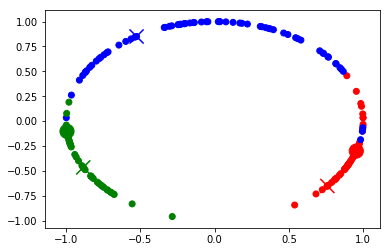

In [4]:
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'orange']

plt.scatter(
    X[:,0], X[:,1], 
    color=[colors[yy] for yy in y])
plt.scatter(
    X_train[:,0], X_train[:,1], 
    color=[colors[yy] for yy in y_train],
    marker='x', s=200)
plt.scatter(
    X_test[:,0], X_test[:,1], 
    color=[colors[yy] for yy in y_test],
    marker='o', s=200)
plt.show()

In [5]:
X_train

array([[ 0.75882634, -0.65129301],
       [-0.5261616 ,  0.8503846 ],
       [-0.88541883, -0.46479404]])

In [6]:
y_train

array([0, 1, 2])

In [7]:
X_test

array([[ 0.95377096, -0.30053444],
       [-0.99471589, -0.10266591]])

In [8]:
y_test

array([0, 2])

In [9]:
from qiskit_qml.feature_maps import NormedAmplitudeEncoding
from qiskit_qml.distance_based.hadamard import QmlHadamardNeighborClassifier
from qiskit_qml.distance_based.hadamard.state import QmlGenericStateCircuitBuilder
from qiskit_qml.distance_based.hadamard.state.sparsevector import MöttönenStatePreparation

initial_state_builder = QmlGenericStateCircuitBuilder(MöttönenStatePreparation())

execution_backend: BaseBackend = qiskit.Aer.get_backend('qasm_simulator')
qml = QmlHadamardNeighborClassifier(backend=execution_backend,
                                    shots=8192, 
                                    classifier_state_factory=initial_state_builder,
                                    feature_map=NormedAmplitudeEncoding())

In [10]:
qml.fit(X_train, y_train)

In [11]:
qml.predict(X_test), y_test

([0, 2], array([0, 2]))

In [12]:
print(qml._last_predict_circuits[0].qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg ancilla[1];
qreg index[2];
qreg data[1];
qreg qlabel[2];
creg clabel[2];
creg branch[1];
ry(1.23095941734077) qlabel[1];
cx qlabel[1],qlabel[0];
ry(0.785398163397448) qlabel[0];
cx qlabel[1],qlabel[0];
ry(0.785398163397448) qlabel[0];
cx qlabel[1],data[0];
ry(0.410694814944012) data[0];
cx qlabel[0],data[0];
ry(-0.280891372620302) data[0];
cx qlabel[1],data[0];
ry(0.121237872372082) data[0];
cx qlabel[0],data[0];
ry(0.812824059936397) data[0];
cx qlabel[1],index[1];
ry(-0.785398163397448) index[1];
cx data[0],index[1];
ry(0) index[1];
cx qlabel[0],index[1];
ry(0) index[1];
cx data[0],index[1];
ry(-0.785398163397448) index[1];
cx qlabel[1],index[1];
ry(0.785398163397448) index[1];
cx data[0],index[1];
ry(0) index[1];
cx qlabel[0],index[1];
ry(0) index[1];
cx data[0],index[1];
ry(0.785398163397448) index[1];
cx qlabel[1],index[0];
ry(0.392699081698724) index[0];
cx index[1],index[0];
ry(0.392699081698724) index[0];
cx data[0],index[0];
ry(0) index